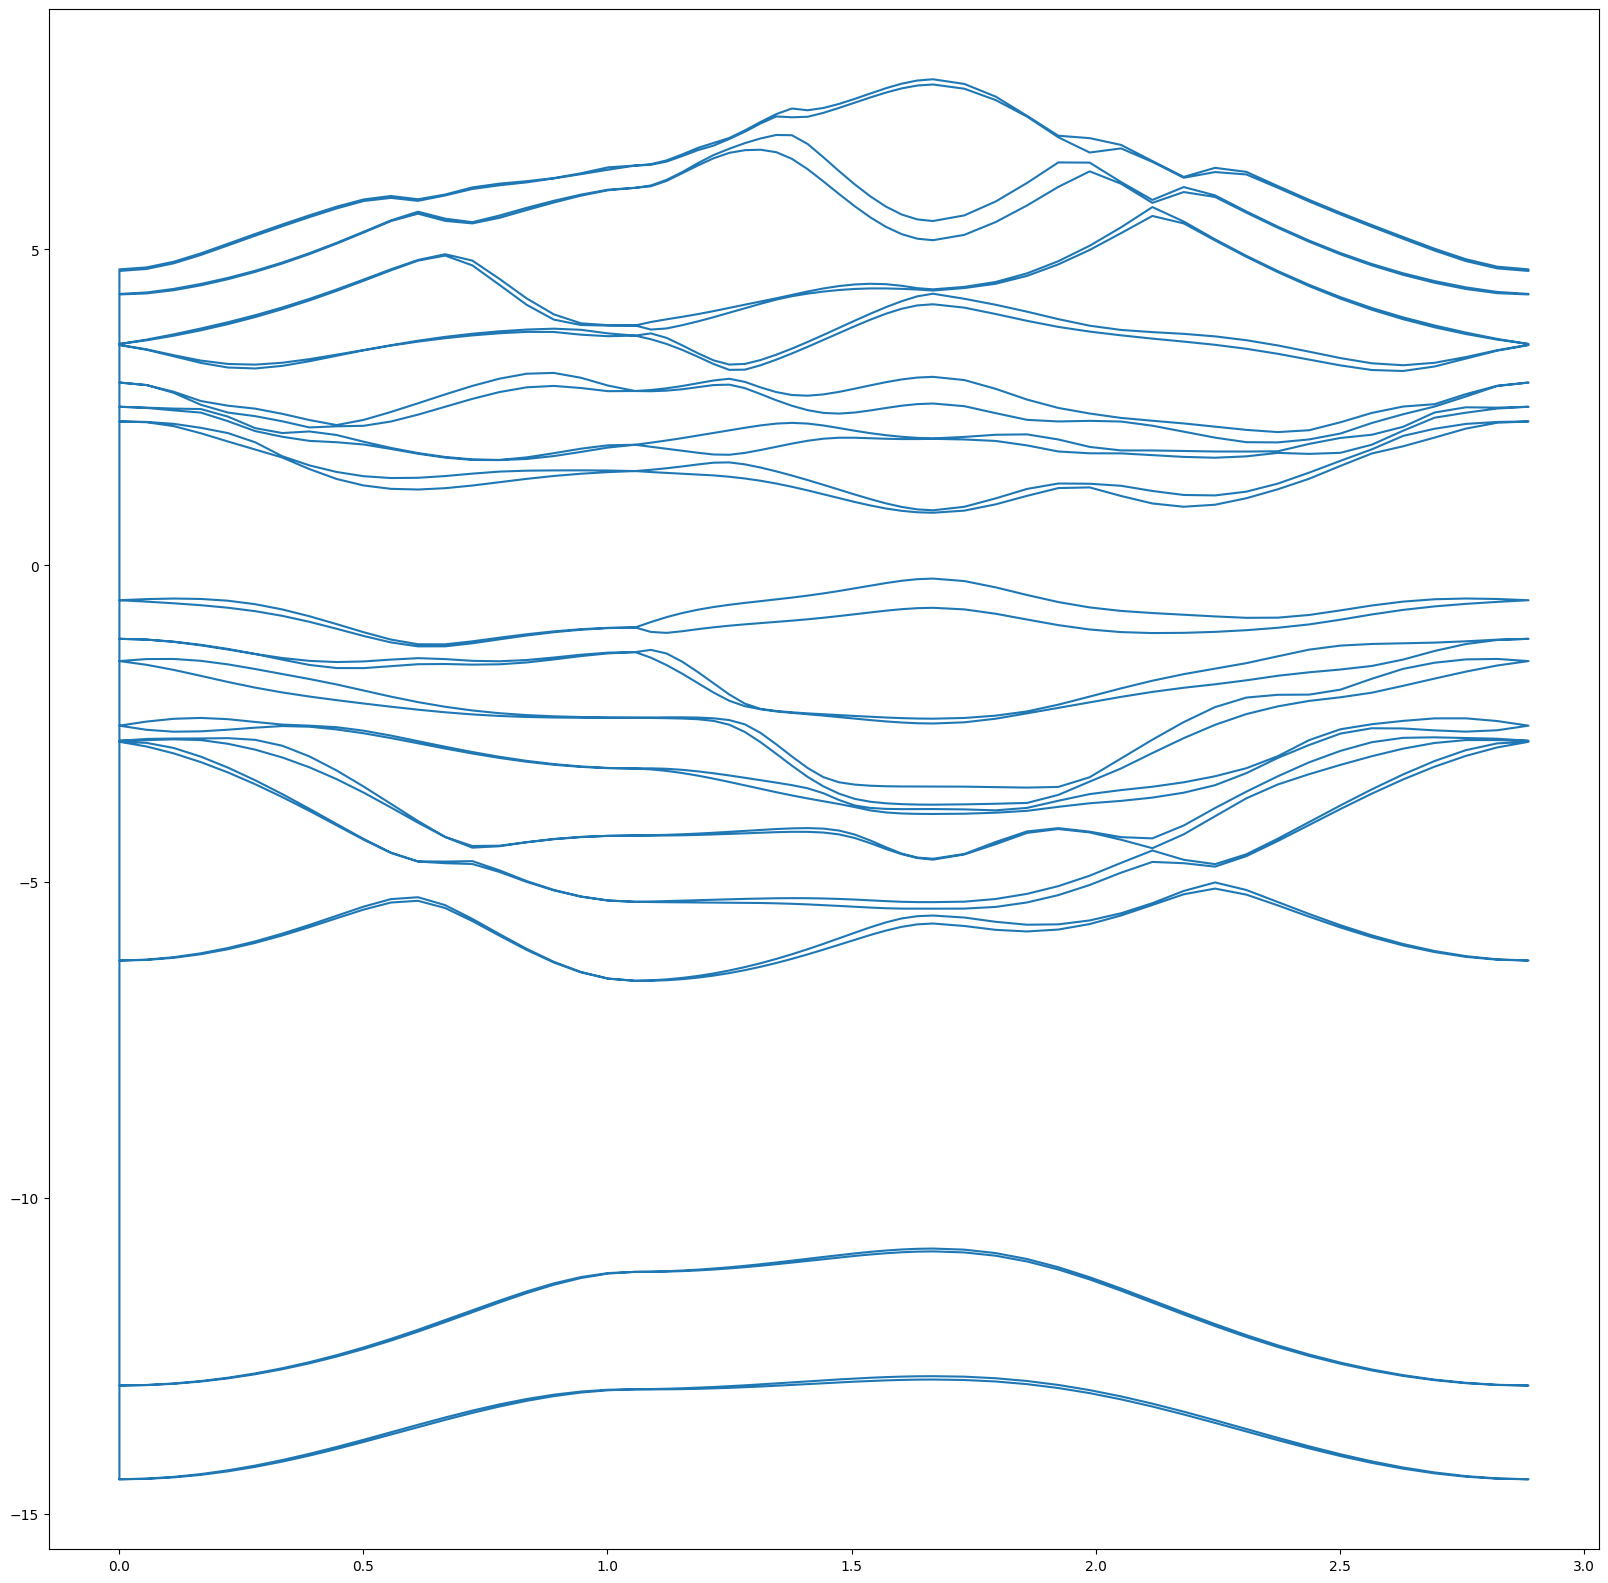

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_bd = np.loadtxt("/content/BAND.dat")
np.set_printoptions(threshold=np.inf)
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(data_bd[:,0],data_bd[:,1])
plt.show()
# for d_sec in range(len(data_bd)):
# print(data_bd)

In [ ]:
data = int(input("enter the number of density of k points :"))
n_freq = int(input("enter the number of atoms in the system :"))
tot_d = data*n_freq
data_tot = [[] for _ in range(int(len(data_bd)/tot_d))]
for i in range(len(data_tot)):
  data_tot[i] = data_bd[i*tot_d:(i+1)*tot_d]
negative_subarrays = []
positive_subarrays = []
for subarray in data_tot:
  # print(subarray[1])
  # print(subarray[1].flatten())
  if all(element < 0 for element in subarray[1].flatten()):
    negative_subarrays.append(subarray)
  elif all(element > 0 for element in subarray[1].flatten()):
    positive_subarrays.append(subarray)
# print(data_bd[0:60])

enter the number of density of k points :20
enter the number of atoms in the system :3


In [ ]:
data_val=[]
data_cond=[]
for i in range(len(data_tot)):
  if (data_tot[i][0])[1] < 0:
    data_val.append(data_tot[i])
  else:
    data_cond.append(data_tot[i])
#### analyzing the conduction band at first ####
min_cond = data_cond[0]
min_conf_ele = min_cond[0][1]
for subarray in data_cond[1:]:
  curr_first = subarray[0][1]
  if curr_first < min_conf_ele:
    min_cond = subarray
    min_conf_ele = curr_first
#### analyzing the valence band at second ####
max_val = data_val[0]
max_valf_ele = max_val[0][1]
for subarray in data_val[1:]:
  curr_first = subarray[0][1]
  if curr_first > max_valf_ele:
    max_val = subarray
    max_valf_ele = curr_first

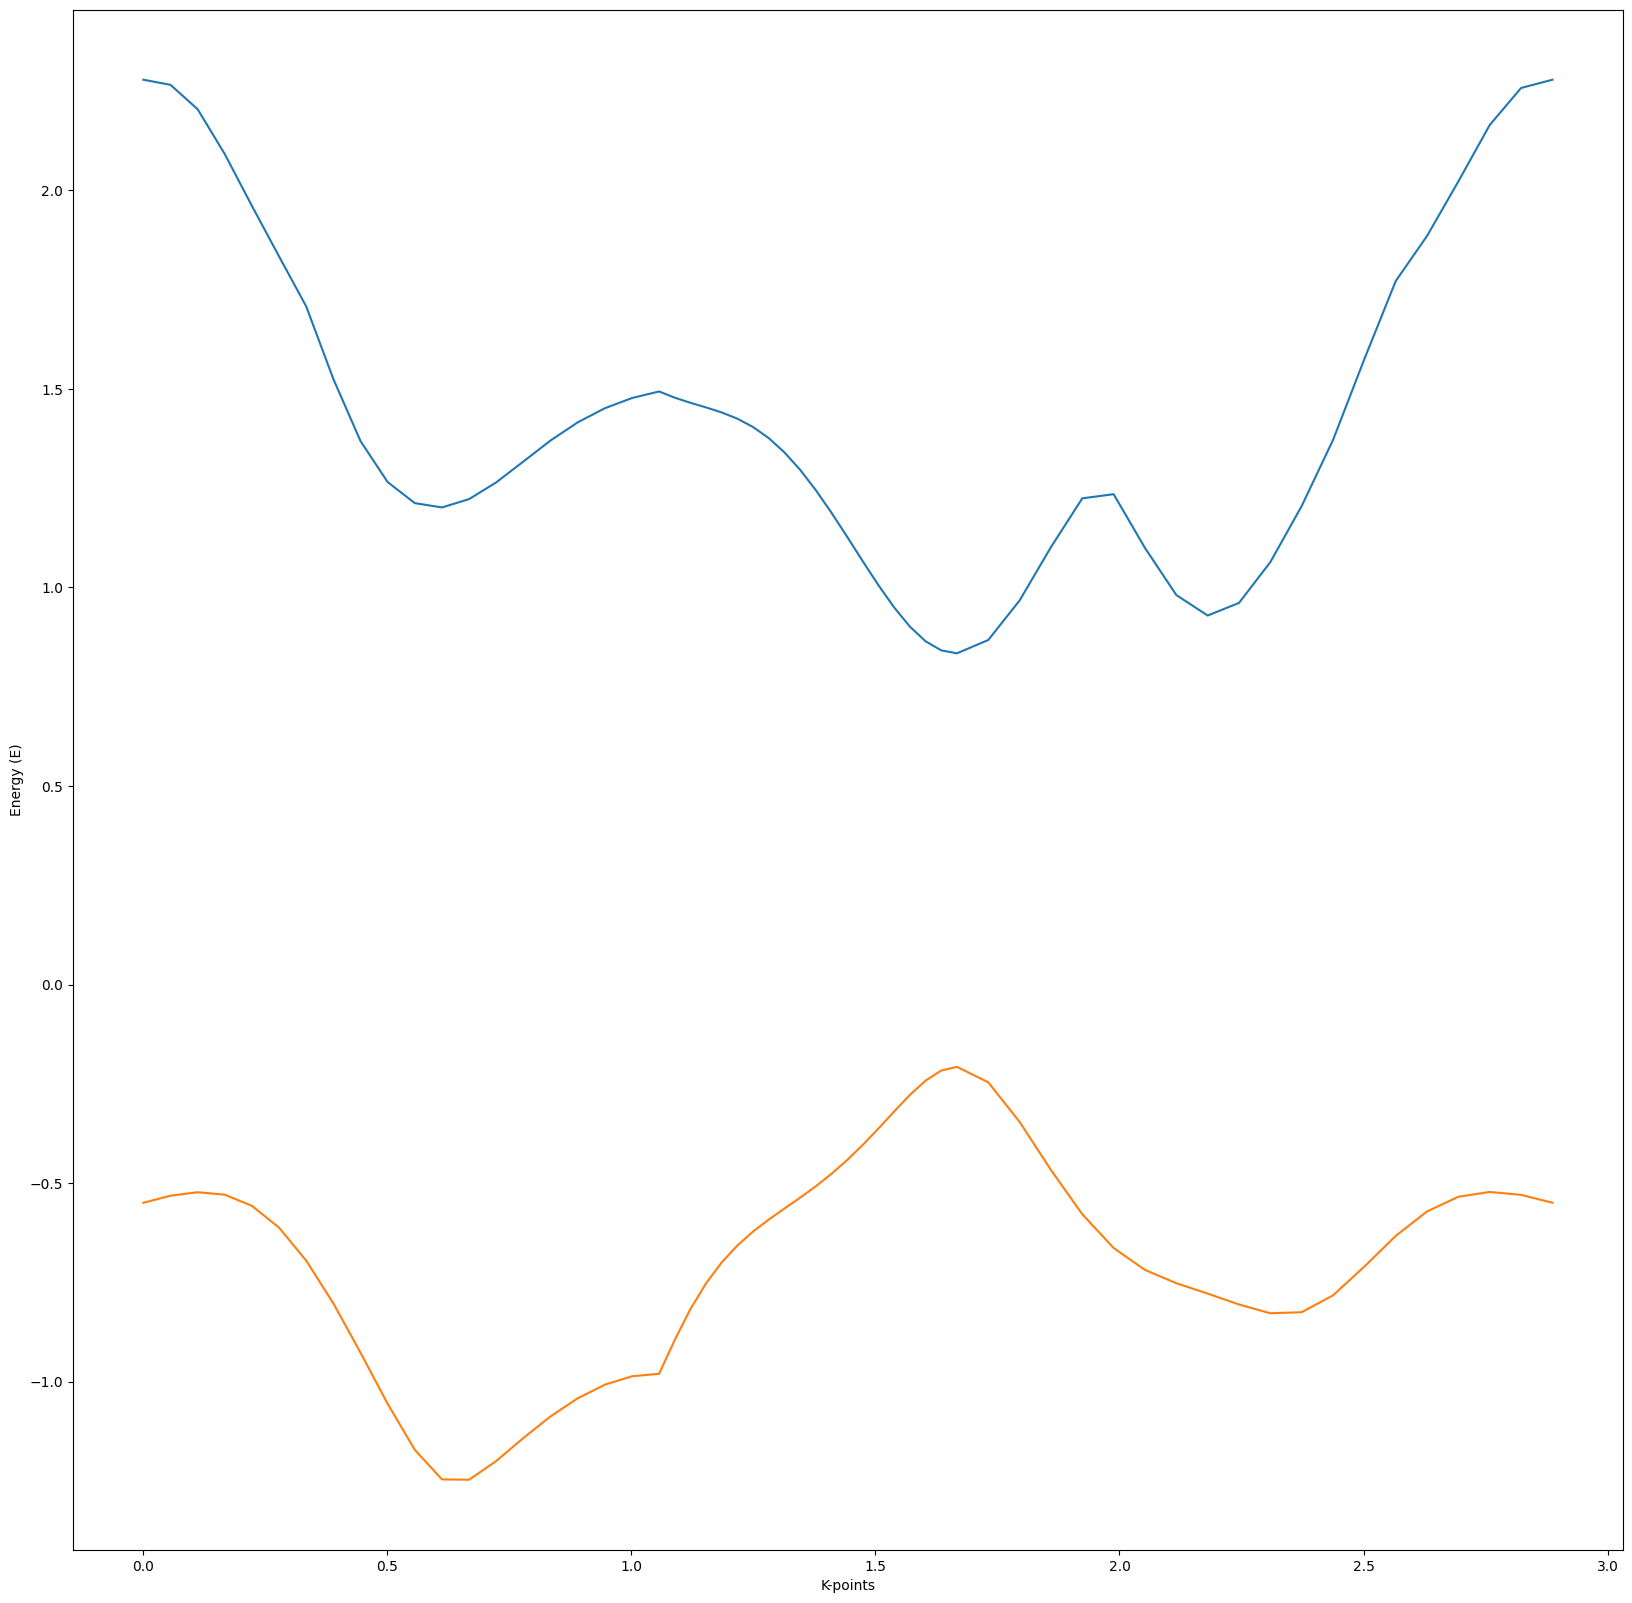

In [ ]:
plt.plot(min_cond[:,0],min_cond[:,1])
plt.plot(max_val[:,0],max_val[:,1])
plt.xlabel("K-points")
plt.ylabel("Energy (E)")
plt.show()

In [ ]:
def better_double_differentiate_finite_diff2(data_matrix):
    if data_matrix.shape[0] < 3:
        return np.array([])

    x = data_matrix[:, 0]
    y = data_matrix[:, 1]
    n = len(x)
    d2y_dx2 = np.zeros(n - 2)

    for i in range(1, n - 1):
        h_plus = x[i+1] - x[i]
        h_minus = x[i] - x[i-1]
        d2y_dx2[i-1] =  (y[i+1]  - 2*y[i]  + y[i-1])  / (h_plus * h_minus )

    return d2y_dx2

In [ ]:
# from IPython.display import Math
effective_masses_cond = []
effective_masses_val = []
max_diffE = []
max_diffk = []
step_size = int(input("Enter the step size for k-points : "))
num_r = int(input("Enter the number of pair of paths : "))
for i in range(0, len(min_cond), step_size):
  gamma_mcond = min_cond[i:i + step_size]
  for j in range(len(gamma_mcond)):
    max_diffE.append(np.max(gamma_mcond[j][1]))
    max_diffk.append(gamma_mcond[np.argmax(gamma_mcond[j][1])][0])
    ind_c = np.argmax(gamma_mcond[j][1])
  h=gamma_mcond[0][0]-gamma_mcond[0][1]
  second_derivative = better_double_differentiate_finite_diff2(gamma_mcond)
  i+=20

Enter the step size for k-points : 20
Enter the number of pair of paths : 3


In [ ]:
def fix_3_vals(gamma, ind_c):
  center_val = gamma[ind_c][1]
  val = []
  three_Ks=[]
  val.append(gamma[ind_c-2][1])
  three_Ks.append(gamma[ind_c-2 ][0])
  val.append(gamma[ind_c-1][1])
  three_Ks.append(gamma[ind_c-1][0])
  val.append(gamma[ind_c][1])
  three_Ks.append(gamma[ind_c][0])
  # val.append(gamma[ind_c+2][1])
  # three_Ks.append(gamma[ind_c+2 ][0])
  new_array= []
  for element in val:
    if element not in new_array:
      new_array.append(element)
  new_arrayK= []
  for element in three_Ks:
    if element not in new_arrayK:
      new_arrayK.append(element)
  return new_array,new_arrayK

In [ ]:
def double_diff(array_2Dv):
  return (array_2Dv[2][1] - 2*array_2Dv[1][1] + array_2Dv[0][1])/(array_2Dv[1][0] - array_2Dv[0][0])**2

In [ ]:
max_diffE1 = []
max_diffk1 = []
max_diffE = []
max_diffk = []
# step_size = int(input("Enter the step size for k-points : "))
# num_r = int(input("Enter the number of pair of paths : "))
step_size = 20
num_r = 3
for i in range(0, len(max_val), step_size):
    gamma_mval = max_val[i:i + step_size]
    max_diffE1.append(np.max(gamma_mval[:,1]))
    max_diffk1.append(gamma_mval[np.argmax(gamma_mval[:,1])][0])
ind_c = np.argmax(max_val[:,1])
val_double_diff = []
array_2Dv = []
for i in range(0, len(max_val), step_size):
    max_vainterim = max_val[i:i + step_size]
    # ind_c1 = np.argmin(min_cointerim[:,1])
    ind_c = np.argmax(max_vainterim[:,1])
    result,resultK = fix_3_vals(max_vainterim, ind_c)
    array_2Dv.append(np.column_stack((resultK, result)))
for j in range(len(array_2Dv)):
  val_double_diff.append(double_diff(array_2Dv[j]))
# result,resultK = fix_3_vals(max_val, ind_c)
# array_2Dv = np.column_stack((resultK, result))
for i in range(0, len(min_cond), step_size):
    gamma_mcond = min_cond[i:i + step_size]
    max_diffE.append(np.max(gamma_mcond[:,1]))
    max_diffk.append(gamma_mcond[np.argmax(gamma_mcond[:,1])][0])
cond_double_diff = []
array_2Dc = []
for i in range(0, len(min_cond), step_size):
    min_cointerim = min_cond[i:i + step_size]
    # ind_c1 = np.argmin(min_cointerim[:,1])
    ind_c1 = np.argmin((min_cointerim[:,1]))
    result1,resultK1 = fix_3_vals(min_cointerim, ind_c1)
    array_2Dc.append(np.column_stack((resultK1, result1)))
for j in range(len(array_2Dc)):
  cond_double_diff.append(double_diff(array_2Dc[j]))

In [ ]:
from IPython.display import Math
ef_mass_cond = []
ef_mass_val = []
for k in range(len(cond_double_diff)):
    ef_mass_cond.append(7.62/cond_double_diff[k])
    ef_mass_val.append(7.62/val_double_diff[k])

In [ ]:
from IPython.display import Math
ef_mass_cond = []
ef_mass_val = []
for k in range(len(cond_double_diff)):
    ef_mass_cond.append(7.62/cond_double_diff[k])
    ef_mass_val.append(7.62/val_double_diff[k])
    #interim_c = np.min(interim_c) # This line is unnecessary and causes an error
interim_c = []
for ele in ef_mass_cond:
    if ele > 0 and ele not in interim_c:
        interim_c.append(ele)
interim_v = []
for ele in ef_mass_val: # Use ef_mass_val to check for holes
    if ele < 0 and ele not in interim_v:
        interim_v.append(ele)
h_max = []
for h in range(len(array_2Dv)):
    for i in range(len(array_2Dv[h])):
        if array_2Dv[h][i][1] in max_val[:,1]:
          if ef_mass_val[h] < 0 and h not in h_max:
            h_max.append(h)
unique_ef_mass_val = [ef_mass_val[index] for index in h_max]
h_min = []
for h in range(len(array_2Dc)):
    for i in range(len(array_2Dc[h])):
        if array_2Dc[h][i][1] in min_cond[:,1]:
          if ef_mass_cond[h] > 0 and h not in h_min:
            h_min.append(h)
unique_ef_mass_cond = [ef_mass_cond[index] for index in h_min]

In [ ]:
# b = str(interim_v)
from IPython.display import Math, display , Latex
# latex_combined0 = rf"$m_e^* = {a} , \quad m_h^* = {b}$"
# Math(latex_combined)
for j in range(len(unique_ef_mass_cond)):
  a = str(unique_ef_mass_cond[j])
  b = str(h_min[j]*step_size)
  c = str((h_min[j]+1)*step_size)
  latex_combined = rf"$m_e^* = {a} , \quad along \quad the \quad path = {b}:{c}$"
  display(Latex(latex_combined))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
for j in range(len(unique_ef_mass_val)):
  a = str(unique_ef_mass_val[j])
  b = str(h_max[j]*step_size)
  c = str((h_max[j]+1)*step_size)
  latex_combined = rf"$m_h^* = {a} , \quad along \quad the \quad path = {b}:{c}$"
  display(Latex(latex_combined))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
array_2Dc[1][0] - array_2Dc[2][0]

array([-1.22022 , -1.393371])